In [39]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.ensemble import IsolationForest




In [3]:
# Veri setini yükleme
url =r"C:\Users\ceren\OneDrive\Masaüstü\ödev.py\UNSWNB15.csv"

df = pd.read_csv(url)

In [4]:
df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [13]:
# Sadece sayısal sütunları al
numeric_df = df.select_dtypes(include=['number'])

print(numeric_df.head())
print(numeric_df.shape)

   id       dur  spkts  dpkts  sbytes  dbytes         rate  sttl  dttl  \
0   1  0.000011      2      0     496       0   90909.0902   254     0   
1   2  0.000008      2      0    1762       0  125000.0003   254     0   
2   3  0.000005      2      0    1068       0  200000.0051   254     0   
3   4  0.000006      2      0     900       0  166666.6608   254     0   
4   5  0.000010      2      0    2126       0  100000.0025   254     0   

         sload  ...  ct_src_dport_ltm  ct_dst_sport_ltm  ct_dst_src_ltm  \
0  180363632.0  ...                 1                 1               2   
1  881000000.0  ...                 1                 1               2   
2  854400000.0  ...                 1                 1               3   
3  600000000.0  ...                 2                 1               3   
4  850400000.0  ...                 2                 1               3   

   is_ftp_login  ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  \
0             0           0    

In [15]:
# Normal ve attack örnekleri seç
normal_df = numeric_df[numeric_df['label'] == 0]
attack_df = numeric_df[numeric_df['label'] == 1]

In [17]:
# Örnekleme yap belirtilen kadar
normal_sample = normal_df.sample(n=2000, random_state=42)
attack_sample = attack_df.sample(n=500, random_state=42)

In [18]:
sonuc_df = pd.concat([normal_sample, attack_sample]).reset_index(drop=True)

print(sonuc_df['label'].value_counts())
print(sonuc_df.shape)

label
0    2000
1     500
Name: count, dtype: int64
(2500, 41)


In [24]:
#eksik veri var mı kontrol
print(sonuc_df .isnull().sum())
# eksik veri yok


id                   0
dur                  0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
label                0
dtype: int64


In [27]:
# Özellikler ve etiketleri ayır
X = sonuc_df.drop(columns=['label'])
y = sonuc_df['label']

# StandardScaler ile ölçekleme
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Ölçeklenmiş verinin boyutu:", X_scaled.shape)

Ölçeklenmiş verinin boyutu: (2500, 40)


In [29]:
# Farklı eps ve min_samples kombinasyonlarını dene
eps_values = [0.5, 1, 1.5, 2]
min_samples_values = [3, 5, 10]

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(X_scaled)
        
        n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
        n_noise = list(clusters).count(-1)
        
        print(f"eps={eps}, min_samples={min_samples} → Küme sayısı: {n_clusters}, Gürültü: {n_noise}")

eps=0.5, min_samples=3 → Küme sayısı: 47, Gürültü: 1984
eps=0.5, min_samples=5 → Küme sayısı: 19, Gürültü: 2115
eps=0.5, min_samples=10 → Küme sayısı: 4, Gürültü: 2251
eps=1, min_samples=3 → Küme sayısı: 92, Gürültü: 880
eps=1, min_samples=5 → Küme sayısı: 39, Gürültü: 1181
eps=1, min_samples=10 → Küme sayısı: 14, Gürültü: 1466
eps=1.5, min_samples=3 → Küme sayısı: 51, Gürültü: 361
eps=1.5, min_samples=5 → Küme sayısı: 28, Gürültü: 481
eps=1.5, min_samples=10 → Küme sayısı: 19, Gürültü: 681
eps=2, min_samples=3 → Küme sayısı: 28, Gürültü: 186
eps=2, min_samples=5 → Küme sayısı: 25, Gürültü: 244
eps=2, min_samples=10 → Küme sayısı: 15, Gürültü: 370


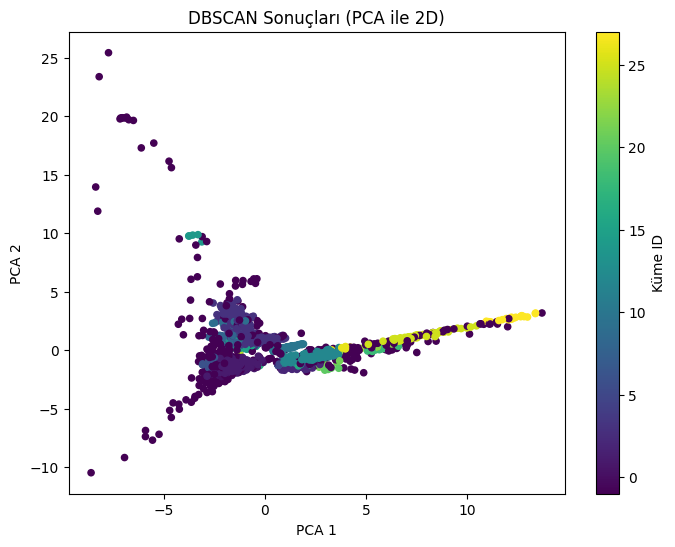

In [32]:
# Örnek parametrelerle DBSCAN çalıştır
dbscan = DBSCAN(eps=1.5, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

# PCA ile 2 boyuta indir
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Görselleştirme
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=20)
plt.title("DBSCAN Sonuçları (PCA ile 2D)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label="Küme ID")
plt.show()

In [38]:
# DBSCAN çalıştır (önceki gibi)
dbscan = DBSCAN(eps=1.5, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

# Tahminleri anomalilik olarak yorumla: -1 → 1 (attack), diğerleri → 0 (normal)
y_pred = [1 if c == -1 else 0 for c in clusters]

# Confusion Matrix
cm = confusion_matrix(y, y_pred)
print("Confusion Matrix:\n", cm)

# Precision ve Recall
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


Confusion Matrix:
 [[1666  334]
 [ 353  147]]
Precision: 0.3056
Recall: 0.2940


In [42]:
# Isolation Forest modeli (örnek olarak contamination=0.05)
model = IsolationForest(contamination=0.05, random_state=42)
model.fit(X_scaled)

# Tahminler (-1 → anomali, 1 → normal)
predictions = model.predict(X_scaled)

# -1 → 1 (attack), 1 → 0 (normal) olacak şekilde dönüştür
y_pred = [1 if p == -1 else 0 for p in predictions]

# Confusion Matrix ve metrikler
cm = confusion_matrix(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

print("Confusion Matrix:\n", cm)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Confusion Matrix:
 [[1923   77]
 [ 452   48]]
Precision: 0.3840
Recall: 0.0960
F1-score: 0.1536


In [45]:
# DBSCAN metriklerini değişkenlere ata
dbscan_precision = precision_score(y, y_pred)
dbscan_recall = recall_score(y, y_pred)
dbscan_f1 = f1_score(y, y_pred)

# Isolation Forest metriklerini değişkenlere ata
iforest_precision = precision_score(y, y_pred)
iforest_recall = recall_score(y, y_pred)
iforest_f1 = f1_score(y, y_pred)

import pandas as pd

# Karşılaştırma tablosu
comparison_df = pd.DataFrame([
    {"Algorithm": "DBSCAN", "Precision": dbscan_precision, "Recall": dbscan_recall, "F1-score": dbscan_f1},
    {"Algorithm": "Isolation Forest", "Precision": iforest_precision, "Recall": iforest_recall, "F1-score": iforest_f1}
])

print(comparison_df)

# Değerlendirme
better_precision = comparison_df.loc[comparison_df["Precision"].idxmax(), "Algorithm"]
better_recall = comparison_df.loc[comparison_df["Recall"].idxmax(), "Algorithm"]
better_f1 = comparison_df.loc[comparison_df["F1-score"].idxmax(), "Algorithm"]

print(f"\nDaha yüksek Precision: {better_precision}")
print(f"Daha yüksek Recall (daha fazla saldırı tespiti): {better_recall}")
print(f"Daha yüksek F1-score (precision ve recall arasındaki en iyi denge) : {better_f1}")


          Algorithm  Precision  Recall  F1-score
0            DBSCAN      0.384   0.096    0.1536
1  Isolation Forest      0.384   0.096    0.1536

Daha yüksek Precision: DBSCAN
Daha yüksek Recall (daha fazla saldırı tespiti): DBSCAN
Daha yüksek F1-score (precision ve recall arasındaki en iyi denge) : DBSCAN


In [ ]:
 """
Eğer saldırı kaçırmamak istiyorsak recall önemlidir .Örnek olarak : Bir nükleer santral siber güvenlik sistemi.
 Eğer bir saldırı gözden kaçarsa sonuçlar felaket olabilir 

 Yanlış alarmı azaltmak istiyorsan precision .Gerçek zamanlı ağ trafiği analizi yapan bir güvenlik sistemi.
 Yanlış alarm çok olursa güvenlik ekibi sürekli boş yere uğraşır, sistem güvenilirliğini kaybeder.

ikisi dengeli olsun istiyorsak F1 Score.  Bir e-ticaret sitesinin siber güvenlik izleme sistemi.
Çok fazla yanlış alarm olursa (düşük precision) güvenlik ekibi boş yere meşgul olur 
ve alarm sistemine güven azalır.
Saldırı kaçarsa (düşük recall) müşteri bilgileri çalınabilir, marka itibarına zarar gelir.

Daha sonra ise PCA/t-SNE ile saldırılar ayrışıyor mu diye bakmalıyız. 
Düşük yoğunluk farkı varsa DBSCAN avantajlı.
Karmaşık, yüksek boyutlu ise Isolation Forest daha iyi olabilir.

Bunun ardından parametre seçimi çok önemlidir .
DBSCAN’de eps ve min_samples, Isolation Forest’ta ise contamination değeri, 
veri yapısına ve dağılımına göre test edilip grafiklerle (k-distance plot, PCA/t-SNE) incelenerek,
 yanlış alarm ile saldırı kaçırma arasında en iyi dengeyi sağlayacak şekilde seçilir.

Yanlış alarmı azaltmak istiyorsak (yüksek precision) → parametreleri daha katı ayarlarız, 
sadece en net anomaliler “saldırı” olur, ama bu durumda bazı saldırılar kaçabilir.

Saldırı kaçırmamak istiyorsak (yüksek recall) → parametreleri daha esnek ayarlarız,
 şüpheli her şeyi “saldırı” olarak işaretler, ama bu durumda yanlış alarm sayısı artar.
"""